# Machine Learning Engineer Nanodegree

## Capstone Project

Roberto Pinto Martins Junior
March 23th, 2018

---

## I. Definition

### Project Overview
Access to credit is important for market economies to develop and flourish, having a big impact on companies and people lives. Banks and financial institutions play an important role in the market, defining who is going to have access to credit.

Money is a limited resource and financial institutions try to evaluate the risks using methods to guess the probability of default and then decide whether or not a loan should be granted. One of these methods is credit scoring which assigns a score to the borrower - it helps the bank evaluate the risk of default and compute interest rates. Using this score, a bank may also assign some credit score category or band, such as bad, poor, fair, good or  excellent.

There has been an increase in the interest for machine learning models in credit risk and scoring, as observed in this [paper][1]  from Moody's, the risk analysis agency. It has also become a business where you can build models: [GiniMachine][2].

This project is based on Kaggle competition ["Give Me Some Credit"][3] and the dataset was provided along with the metrics used to rank the submissions. This project will follow the same metrics and requirements and add some.

[1]: https://www.moodysanalytics.com/risk-perspectives-magazine/managing-disruption/spotlight/machine-learning-challenges-lessons-and-opportunities-in-credit-risk-modeling "Machine Learning: Challenges, Lessons and Opportunities in Credit Risk Modeling"
[2]: https://ginimachine.com "GiniMachine.com"
[3]: https://www.kaggle.com/c/GiveMeSomeCredit "Give Me Some Credit"

### Problem Statement
The goal is to create a model that predicts borrowers' credit score so the bank will be able to determine the likelihood of a default and then compute the interest rate for the loan. In this binary classification problem, the model will classify if the potential borrower will experience a 90+ day past due delinquency, but will also output the probability of the classification, as required by the competition. This model may also be used by borrowers to help them make the best financial decisions.

Using machine learning to solve this proble will involve the following tasks:
1. Load the dataset
2. Explore and visualize the data, trying to better understand it
3. Prepare the dataset to be processed, handle missing information, scale and encode features, if needed.
4. Split the dataset into training and test sets
5. Train some classifiers
6. Evaluate the performance in the test set using appropriate metrics
7. Select the best classifier and fine tune its hyperparameters

### Metrics
Evaluation of the models will be based on the requirements of the Kaggle competition: area under curve (AUC); after computing the receiving operating characteristic (ROC) and therefore, the closer the classifier gets to 1.0, the better. Using this metric, it’s possible to plot the coordinates created by false positive rate and true positive rate. The closer the area under the curve gets to a square, the better.

Additionally, it's also going to consider the F-beta score for model evaluation, considering it's the kind of problem in which recall is important. This importance is crucial to the bank or credit institution, which need to correctly classify bad payers and thus avoiding giving credit to someone who is going to be late or not paying at all. Therefore the model must show a high rate of correctly classified bad payers over all the borrowers who previously experienced credit delinquency. 


---

## II. Analysis

### Data Exploration
This project dataset contains financial and credit information from 251,503 anonymous individuals, already divided in 150,000 records for training and 101.503 for testing, although this test set is meant to be used when submitting the results to the competition.

_Table 1. Data dictionary_

| Variable | Description | Type |
| :--- | :--- | :---: |
| **SeriousDlqin2yrs** | Person experienced 90 days past due delinquency or worse | Y/N |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age | Age of borrower in years | integer |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years | integer |
| DebtRatio | Monthly debt payments, alimony,living costs divided by monthly gross income | percentage |
| MonthlyIncome | Monthly income | real |
| NumberOfOpenCreditLinesAndLoans | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) | integer |
| NumberOfTimes90DaysLate | Number of times borrower has been 90 days or more past due | integer |
| NumberRealEstateLoansOrLines | Number of mortgage and real estate loans including home equity lines of credit | integer |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years | integer |
| NumberOfDependents | Number of dependents in family excluding themselves (spouse, children etc.) | integer |

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
try:
    csTraining = pd.read_csv("dataset/cs-training.csv", index_col = 0)
    display(Markdown("_Table 2. Sampling first 5 rows of the dataset_"))
    display(csTraining.head(5))
    print "* Credit dataset has {} samples with {} features each.".format(*csTraining.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

_Table 2. Sampling first 5 rows of the dataset_

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


* Credit dataset has 150000 samples with 11 features each.


#### Statistics

Now that the dataset is loaded, statistical information is presented:

In [2]:
display(Markdown("_Table 3. Statistical information: central tendency, dispersion and shape_"))
display(csTraining.describe())

_Table 3. Statistical information: central tendency, dispersion and shape_

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Performing a quick exploration of the dataset, it was observed to be definitively an unbalanced one. 
Some features are sparse, most notably our target class __SeriousDlqin2yrs__. In this class, individuals who experienced credit distress account for only 6.684% (10,026) of our samples.

This adds some serious implications to the model, even though predicting that SeriousDlqin2yrs is always 0 (zero), it might achieve high precision.

In [3]:
# Counting SeriousDlqin2yrs "1" value
def showNaiveMetrics(data):
    """
    Show some metrics of the dataset when considering the naive assumption,
    such as: true positives, true negatives, false positives, false negatives,
    precision, accuracy and recall.
    """
    delinquencyCount = data.SeriousDlqin2yrs[data.SeriousDlqin2yrs == 1].count()
    delinquencyRatio = float(delinquencyCount) / data.SeriousDlqin2yrs.count()
    totalPopulation = data.SeriousDlqin2yrs.count()

    naive_FP = 0
    naive_TP = 0
    naive_FN = delinquencyCount
    naive_TN = data.SeriousDlqin2yrs[data.SeriousDlqin2yrs == 0].count() 
    naive_Accuracy = float(naive_TP + naive_TN) / totalPopulation
    naive_Precision = 0 # to avoid division by zero
    naive_Recall = float(naive_TP) / (naive_TP + naive_FN)

    print "Samples in serious credit delinquency: {}".format(delinquencyCount)
    print "Percentage of delinquency: {}%".format(delinquencyRatio * 100.0)
    print "False positives in naive assumption: {}".format(naive_FP)
    print "True positives in naive assumption: {}".format(naive_TP)
    print "False negatives in naive assumption: {}".format(naive_FN)
    print "True negatives in naive assumption: {}".format(naive_TN)
    print "Accuracy in naive assumption: {0:.3f}%".format(naive_Accuracy * 100.0)
    print "Precision in naive assumption: {0:.3f}%".format(naive_Precision * 100.0)
    print "Recall in naive assumption: {0:.3f}%".format(naive_Recall * 100.0)
    
showNaiveMetrics(csTraining)

Samples in serious credit delinquency: 10026
Percentage of delinquency: 6.684%
False positives in naive assumption: 0
True positives in naive assumption: 0
False negatives in naive assumption: 10026
True negatives in naive assumption: 139974
Accuracy in naive assumption: 93.316%
Precision in naive assumption: 0.000%
Recall in naive assumption: 0.000%


If we consider that our model predicts that everybody has good credit (SeriousDlqin2yrs = 0), our model will still present an astonishing accuracy of 93.316% while increasing the credit risk for the financial institution.

$$Accuracy_{(naive)} = { true\ positives + true\ negatives \over total\ population} = {0 + 139,974 \over 150,000} = 93.316\%$$

---
It was also observed some missing values, as shown below as NaN.

In [4]:
# Showing examples of missing values
indices = [9220, 9236, 71995, 80512, 112426]
display(Markdown("_Table 4. Samples with missing values_"))
display(pd.DataFrame(csTraining.loc[indices], columns = csTraining.keys()))

_Table 4. Samples with missing values_

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
9220,0,0.095339,62,0,2504.0,NaN,11,0,1,0,0.0
9236,1,1.000000,37,0,220.0,NaN,1,2,0,0,0.0
71995,0,0.002049,80,0,4128.0,NaN,11,0,2,0,NaN
80512,0,1.000000,49,0,806.0,NaN,2,0,0,0,0.0
112426,0,0.280411,42,0,1957.0,NaN,7,0,1,0,0.0


These NaN values where observed in _MonthlyIncome_ and _NumberOfDependents_ but can occur in any other column. Therefore to inspect if NaN values are really present in other features:

In [5]:
# Counting the number of NaN per feature
display(Markdown("""
#### Here is shown the number of NaN values detected in each feature.
"""))
display(csTraining.isnull().sum())


#### Here is shown the number of NaN values detected in each feature.


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [6]:
print "% of NaN in MonthlyIncome: {0:.2f}%".format(float(csTraining.MonthlyIncome.isnull().sum()) / csTraining.MonthlyIncome.count() * 100)
print "% of NaN in NumberOfDependents: {0:.2f}%".format(float(csTraining.NumberOfDependents.isnull().sum()) / csTraining.NumberOfDependents.count() * 100)

% of NaN in MonthlyIncome: 24.72%
% of NaN in NumberOfDependents: 2.69%


Due to the significant amount of missing values in __MonthlyIncome__ and __NumberOfDependents__, a strategy must to be devised to handle these missing values. One possible strategy is replacing these values by the mean or median.

Furthermore, missing values are not the only abnormality that may be found in a dataset. Here the identification of possible outliers is done using [Tukey's method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), which however doesn't make any assumption about the distribution of the data.

In [7]:
indx = {}
# Droping SeriousDlqin2yrs, which is our target
target = csTraining['SeriousDlqin2yrs']
features_raw = csTraining.drop('SeriousDlqin2yrs', axis = 1)

_features = features_raw.keys()
infoTable = []

for feature in _features:

    # Calculating Q1 25th percentile of the data) for the given feature
    Q1 = np.nanpercentile(features_raw[feature], 25)  
    # Calculating Q3 (75th percentile of the data) for the given feature
    Q3 = np.nanpercentile(features_raw[feature], 75)
    
    # Using the interquartile range to calculate an outlier step (a factor of the interquartile range)
    fenceFactor = 2.0
    step = fenceFactor * (Q3 - Q1)
    
    # Displaying outliers
    outlrs = features_raw[~((features_raw[feature] >= (Q1 - step)) & (features_raw[feature] <= (Q3 + step)))]
    
    # Saving the outliers position for each feature
    indx[feature] = np.asarray(outlrs.index)
    
    # Saving stats
    infoTable = infoTable + [(Q1, Q3, step, Q1 - step, Q3 + step, len(indx[feature]))]
    
display(Markdown("_Table 5. Possible outliers identified by Tukey's method (2.0 x IQR)_"))
tukeyData = pd.DataFrame(infoTable,
                         columns = ['Q1', 'Q3', 'IQR', 'Lower Fence', 'Upper Fence', '# of Outliers'],
                         index = _features)
display(tukeyData)

_Table 5. Possible outliers identified by Tukey's method (2.0 x IQR)_

,Q1,Q3,IQR,Lower Fence,Upper Fence,# of Outliers
RevolvingUtilizationOfUnsecuredLines,0.029867,0.559046,1.058358,-1.028490,1.617404,528
age,41.000000,63.000000,44.000000,-3.000000,107.000000,2
NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.000000,0.000000,0.000000,0.000000,23982
DebtRatio,0.175074,0.868254,1.386360,-1.211286,2.254614,30815
MonthlyIncome,3400.000000,8249.000000,9698.000000,-6298.000000,17947.000000,32865
NumberOfOpenCreditLinesAndLoans,5.000000,11.000000,12.000000,-7.000000,23.000000,1898
NumberOfTimes90DaysLate,0.000000,0.000000,0.000000,0.000000,0.000000,8338
NumberRealEstateLoansOrLines,0.000000,2.000000,4.000000,-4.000000,6.000000,473
NumberOfTime60-89DaysPastDueNotWorse,0.000000,0.000000,0.000000,0.000000,0.000000,7604
NumberOfDependents,0.000000,1.000000,2.000000,-2.000000,3.000000,7777


Observing the information above, it is clear that the type of distribution must be considered before identifying and removing outliers - simply removing outliers based on Tukey's method may remove valuable information.

---

### Exploratory Visualization

While exploring the dataset, it was observed the presence of some sparse features and abnormalities as well. One characteristic that could particularly affect this project is the distribution type and skewness.

To better understand those distributions, histograms of the features are shown below.

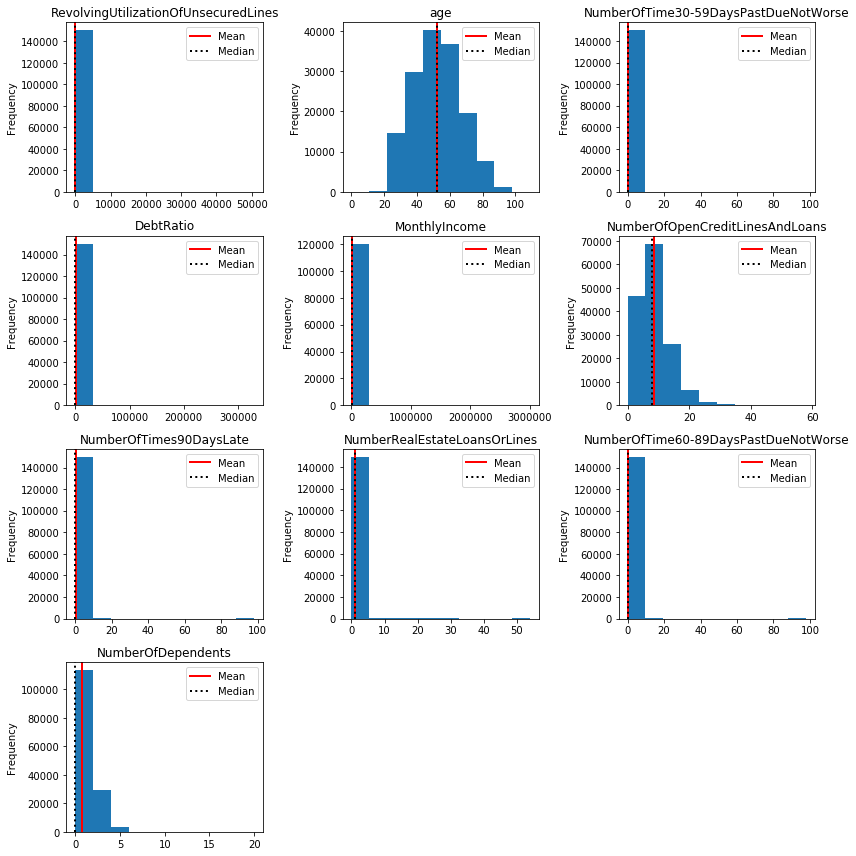

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 12))

i = 1
for f in features_raw.keys():
    plt.subplot(4, 3, i)
    plt.title(f)
    features_raw[f].plot.hist()
    meanLine = plt.axvline(features_raw[f].mean(), color = 'r', linestyle = 'solid', linewidth = 2, label = 'Mean')
    medianLine = plt.axvline(features_raw[f].median(), color = 'black', linestyle = 'dotted', linewidth = 2, label = 'Median')
    plt.legend(handles = [meanLine, medianLine])
    i = i + 1
    
plt.tight_layout()

Due to the high frequency of some values in most of the features, it's not possible to observe and explore the distributions in the current scale. Although **age** seems to be the only exception, in which is possible to observe a normal-like distribution.

### Algorithms and Techniques


The solution will predict if the borrower will be in financial distress within two years and will also provide the probability of being in that category. First, some aspects of the dataset will be visualized to improve understanding over the dataset and then prepared for being processed in the training and testing stages.

In this binary classification solution, some models will be tested, such as Gradient Boosting, KNeighbors and SGD. These models will be evaluated by metrics such as accuracy, f-beta score and area under curve. The metric that will definitively select the best model is *area under curve*, which is expected to be more suitable to this kind of sparse dataset and which is also a requirement of the competition.

The selection of the algorithms is partially based in skLearn model selection "cheat-sheet" ([Choosing the right estimator](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)).

**Stochastic Gradient Descent**, or just SGD, has been used since 1960 to train a wide range of models including (linear) support vector machines, logistic regression [1]. It's a very efficient model and was successfully applied in other machine learning problems with sparse dataset [2], and therefore SGD may be a good candidate to solve our problem.

**KNeighbors** may be one of the simplest algorithms but it is used in some interesting classification problems, such as handwritten digits and image classification. This type of classification works by consulting the dataset and assigning a label to the datapoint based on nearest neighbors, hence called instance-based learning or non-generalizing learning [3]. KNeighborsClassifier may be a good candidate, considering that credit delinquency may share similar characteristics and therefore, KNeighborClassifier can compare a potential delinquent to its neighbors and classify it accordingly.

**Gradient Boosting** or just GBM has been used to build ranking models for information retrieval systems, seach engines and recommender systems, to name a few of them [4],[5]. It's an ensemble method, that is, it's built from simpler, weaker learners (CART usually) and they are iteratively combined to form a strong learner, which tries to improve where it performed poorly in the last iterations. Due to the sparseness of the dataset, a robust algorithm like GBM may perform better where other algorithm may fail.

The dataset will be prepared based on its characteristics and abnormalities found in data exploration section and will be split into training and testing sets, in a stratified fashion, due to the sparseness of our target feature.

These algorithms will be tested using the default parameters whenever possible, except in some few cases. SGD classifier is created using 'log' loss function to be able to use *predict_proba()* method and *max_iter = 1000* to avoid getting different results depending on the sklearn version, which may have different default values. KNeighbors will be used with *n_neighbors = 2* instead of the default 5, since it's a binary classification problem. Gradient Boosting classifier will be created with *random_state = 0* to avoid differences in the result of different code executions, and *presort = False* to avoid sorting the sparse dataset.

After selecting the best performer, based on benchmark and metrics, it will have its hyperparameters fine tuned and the competition test set processed and saved.

[1]: https://en.wikipedia.org/wiki/Stochastic_gradient_descent "Wikipedia - Stochastic Gradient Descent"
[2]: http://scikit-learn.org/stable/modules/sgd.html#sgd "sklearn - Stochastic Gradient Descent"
[3]: http://scikit-learn.org/stable/modules/neighbors.html "Nearest Neighbors"
[4]: https://en.wikipedia.org/wiki/Gradient_boosting "Gradient Boosting"
[5]: https://en.wikipedia.org/wiki/Learning_to_rank "Learning to rank"

---

## III. Methodology

### Data Preprocessing

Data preprocessing will prepare the input of our models and it is essential to robust and consistent results. It usually involves the selection, preprocessing and transformation of data to be better processed later.

#### Replacing NaN and missing values

All the missing values interpreted as NaN must be replaced by the median. This strategy is used to avoid missing the entire sample and using the median won't affect the feature statistics. As detected earlier in Data Exploration section, only **MonthlyIncome** and **NumberOfDependents** have NaN values.

In [9]:
def replaceNaNvaluesByMean(data):
    """
    Replace all missing values from MonthlyIncome and NumberOfDependents
    by their mean.
    """
    nanFeaturesWithMean = {'MonthlyIncome': csTraining.MonthlyIncome.mean(),
                           'NumberOfDependents': csTraining.NumberOfDependents.mean()}
    
    tmp = pd.DataFrame(data = data, copy = True)
    tmp.fillna(value = nanFeaturesWithMean, inplace = True)
    
    return tmp

def replaceNaNvaluesByMedian(data):
    """
    Replace all missing values from MonthlyIncome and NumberOfDependents
    by their median.
    """
    nanFeaturesWithMedian = {'MonthlyIncome': csTraining.MonthlyIncome.median(),
                             'NumberOfDependents': csTraining.NumberOfDependents.median()}
    
    tmp = pd.DataFrame(data = data, copy = True)
    tmp.fillna(value = nanFeaturesWithMedian, inplace = True)
    
    return tmp

featuresWithoutNaN = replaceNaNvaluesByMedian(features_raw)

# Counting the number of NaN per feature
display(Markdown("""
#### Here is shown the number of NaN values now present in each feature.
"""))
display(featuresWithoutNaN.isnull().sum())


#### Here is shown the number of NaN values now present in each feature.


RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

#### Log transformation

The distributions found while exploring and visualizing the dataset, presented some highly skewed pattern. For these highly-skewed distributions, it is common practice to apply a [logarithmic transformation][] on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers.

[logarithmic transformation]: https://en.wikipedia.org/wiki/Data_transformation_(statistics)

In [10]:
# Applying log transformation

keys = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
          'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
          'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

def applyLogTransformation(data, features):
    """
    Apply log transformation to each feature listed in features parameter
    """
    logData = pd.DataFrame(data = data, copy = True)
    logData[features] = logData[features].apply(lambda x: np.log(x + 1))
    return logData
    
featuresLogTransformed = applyLogTransformation(featuresWithoutNaN, keys)

print "Applied log transformation to {}".format(keys)

Applied log transformation to ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


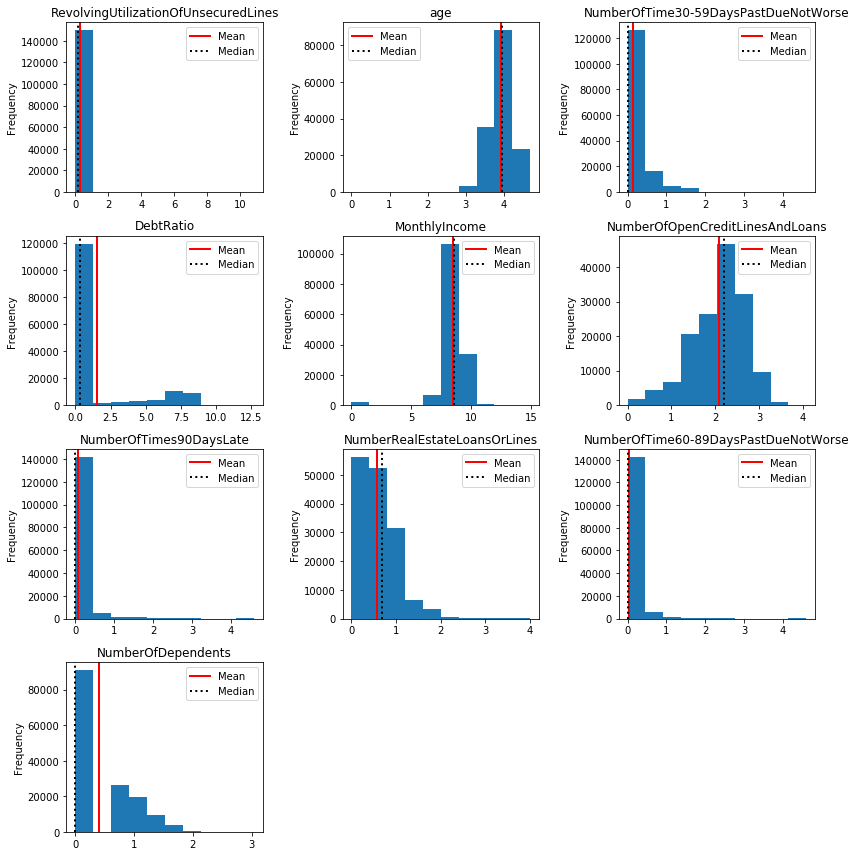

In [11]:
# Visualizing features histograms after log transformation

plt.figure(figsize = (12, 12))

i = 1
for f in featuresLogTransformed.keys():
    plt.subplot(4, 3, i)
    plt.title(f)
    featuresLogTransformed[f].plot.hist()
    meanLine = plt.axvline(featuresLogTransformed[f].mean(), color = 'r', linestyle = 'solid', linewidth = 2, label = 'Mean')
    medianLine = plt.axvline(featuresLogTransformed[f].median(), color = 'black', linestyle = 'dotted', linewidth = 2, label = 'Median')
    plt.legend(handles = [meanLine, medianLine])
    i = i + 1
    
plt.tight_layout()

In [12]:
# Show an example of a record with scaling applied
features_final = featuresLogTransformed
display(Markdown("_Table 6. Sampling first 5 rows of the transformed dataset_"))
display(features_final.head(n = 5))

_Table 6. Sampling first 5 rows of the transformed dataset_

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.568789,3.828641,1.098612,0.589442,9.118335,2.639057,0.000000,1.945910,0.0,1.098612
2,0.671490,3.713572,0.000000,0.115002,7.863651,1.609438,0.000000,0.000000,0.0,0.693147
3,0.505721,3.663562,0.693147,0.081684,8.020599,1.098612,0.693147,0.000000,0.0,0.000000
4,0.210107,3.433987,0.000000,0.035415,8.101981,1.791759,0.000000,0.000000,0.0,0.000000
5,0.645657,3.912023,0.693147,0.024620,11.060196,2.079442,0.000000,0.693147,0.0,0.000000


Since all features are numerical, preprocessing stages such as conversion of non-numeric categorical data won't be needed.

#### Training and Test sets

As a final stage of our data preparation, the normalized dataset will be split (both features and labels) into training and test sets in a 80-20% ratio, respectively. The training set will be used to train our model and the test set will be used to evaluate them using 'unseen' data.

In [13]:
from sklearn.model_selection import train_test_split

# Split 'features_final' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target,
                                                    stratify = target,
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 120000 samples.
Testing set has 30000 samples.


---

### Benchmark

As observed before, our dataset is unbalanced – samples of credit delinquency account only for 6.68% of the samples - and therefore one possible benchmark model is the naïve predictor, which could consider that all borrowers have good credit (hadn't experienced 90+ days past due delinquency) and yet would present a 93.316% accuracy. However, we need a better benchmark for our future model.

After preparations in our dataset, a linear logistic regression (with no parameter tuning) will be used as benchmark model. It's a simple predictive model that will be used in place of the naïve predictor, and hopefully, will provide means to compare our models and eliminate the worst performers.

Due to some abnormalities found in the dataset (NaN values), it was necessary to perform the bechmarking after data preparation. Otherwise, the chosen algorithm for the benchmark will fail to process the samples.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, accuracy_score, roc_curve, auc, roc_auc_score
from datetime import timedelta
from time import time

lrc = LogisticRegression(random_state = 0)

start = time()
lrc.fit(X_train, y_train)
end = time()

training_time = timedelta(seconds = end - start)
print "Trained LogisticRegression Classifier in {}".format(str(training_time))

pred_test = lrc.predict(X_test)
prob_test = lrc.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, pred_test)
fbeta = fbeta_score(y_test, pred_test, beta = 2.0)
fpr, tpr, ts = roc_curve(y_test, prob_test)
roc_auc = auc(fpr, tpr)

results = {}
results['Benchmark'] = {'probabilities': prob_test,
                        'accuracy': accuracy,
                        'fbeta': fbeta,
                        'time': training_time,
                        'roc_auc': roc_auc}

metrics = [(training_time, accuracy, fbeta, roc_auc)]

display(Markdown("_Table 7. Benchmark model results_"))
display(pd.DataFrame(metrics,
                     columns = ['Training time', 'Accuracy', 'fbeta2', 'ROC AUC'],
                     index = ['Logistic Regression']))

Trained LogisticRegression Classifier in 0:00:00.972847


_Table 7. Benchmark model results_

,Training time,Accuracy,fbeta2,ROC AUC
Logistic Regression,00:00:00.972847,0.9351,0.150496,0.839294


---

### Implementation

Some training models will be used and compared, such as Gradient Boosting, KNeighbors and SGD classifiers. 

All three algorithms will be used to train a model and gather enough information during the process to evaluate the best one.

The best model will be evaluated using area under curve (a competition requirement), but accuracy and f-beta score will also be used to study each one in the context of a sparse dataset.

### Training

The split dataset will be used to train and later evaluate the model. Three different algorithms will be used: Stochastic Gradient Descent, KNeighbors and Gradient Boosting classifiers; and the best performing will be selected for future fine tuning. The choice of algorithms was based in the sklearn chart for choosing estimators. [1]

At this point, three metrics will be used to evaluate the models: accuracy, f-score and area under curve using the receiver operating characteristic. In the case of f-score metric, a beta of 2.0 will be used to consider more recall than precision in the harmonic mean.

#### Stochastic Gradient Descent ####

* *Stochastic Gradient Descent, or just SGD, has been used since 1960 to train a wide range of models including (linear) support vector machines, logistic regression [2]. In fact, when using its default loss function, SGD gives a linear suport vector machine. [3]*

* *SGD is very efficient and easy to implement, but may be sensitive to feature scaling. [4]* 

* *Has also been successfully applied in sparse machine learning problems, which can be very useful for our problem. [4]*

[1]: http://scikit-learn.org/stable/tutorial/machine_learning_map/ "sklearn - Choosing the right estimator"
[2]: https://en.wikipedia.org/wiki/Stochastic_gradient_descent "Wikipedia - Stochastic Gradient Descent"
[3]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html "SGDClassifier"
[4]: http://scikit-learn.org/stable/modules/sgd.html#sgd "sklearn - Stochastic Gradient Descent"

In [15]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'log', max_iter = 1000)

start = time()
sgd.fit(X_train, y_train)
end = time()

training_time = timedelta(seconds = end - start)
print "Trained SGD Classifier in {}".format(str(training_time))

pred_test = sgd.predict(X_test)
prob_test = sgd.predict_proba(X_test)[:, 1]

results['sgd'] = {'probabilities': prob_test,
                  'accuracy': accuracy_score(y_test, pred_test),
                  'fbeta': fbeta_score(y_test, pred_test, beta = 2.0),
                  'time': training_time}

Trained SGD Classifier in 0:00:49.935813


#### KNeighborsClassifier ####

* *KNeighborsClassifiers are used in handwritten digits and image classification. This type of classification works by consulting the dataset and assigning a label to the datapoint based on nearest neighbors, hence called instance-based learning or non-generalizing learning. [4]*

* *Its strength comes from the fact that it's one of the simplest, yet powerful machine learning algorithm. As the amount of data increases to infinity, it's guaranteed that a two-class KNeighborsClassifier won't yeld an error rate worse than twice the Bayes error rate. [5]*

* *KNeighborsClassifier may suffer the Curse of Dimensionality, which in KNeighbors context means that calculating the distance of the neighbors to the datapoint may be time consuming and unhelpful when there are lots of features (neighbors) in the dataset. It's also very sensitive to noise, if present in the dataset. [5]*

* *KNeighborsClassifier may be a good candidate, considering that credit delinquency may share similar characteristics and therefore, KNeighborClassifier can compare a potential delinquent to its neighbors and classify it accordingly.*

[4]: http://scikit-learn.org/stable/modules/neighbors.html "Nearest Neighbors"
[5]: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm "k-nearest neighbors algorithm"

In [16]:
from sklearn.neighbors import KNeighborsClassifier

kneigh = KNeighborsClassifier(n_neighbors = 2) # because we have only 2 categories

start = time()
kneigh.fit(X_train, y_train)
end = time()

training_time = timedelta(seconds = end - start)
print "Trained KNeighbors Classifier in {}".format(str(training_time))

pred_test = kneigh.predict(X_test)
prob_test = kneigh.predict_proba(X_test)[:, 1]

results['kneigh'] = {'probabilities': prob_test,
                     'accuracy': accuracy_score(y_test, pred_test),
                     'fbeta': fbeta_score(y_test, pred_test, beta = 2.0),
                     'time': training_time}

Trained KNeighbors Classifier in 0:00:03.163364


#### Gradient Boosting ####

* *Gradient Tree Boosting, Gradient Boosting Machine or just Gradient Boosting has been used to build ranking models for information retrieval systems, search engines and recommender systems, to name a few of them. [6],[7]*

* *As a ensemble method, one of its stregnths is using simpler, weaker learners (decision trees usually) and combine them to form strong learners iteratively and at each iteration, putting more weight on where it performed poorly.*

* *Gradient Boosting is known to be harder to fine tune than other methods, but once well adjusted, GB usually gives good results.*

[6]: https://en.wikipedia.org/wiki/Gradient_boosting "Gradient Boosting"
[7]: https://en.wikipedia.org/wiki/Learning_to_rank "Learning to rank"

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state = 0, presort = False)

start = time()
gbm.fit(X_train, y_train)
end = time()

training_time = timedelta(seconds = end - start)
print "Trained GradientBoosting Classifier in {} s".format(str(training_time))

pred_test = gbm.predict(X_test)
prob_test = gbm.predict_proba(X_test)[:, 1]

results['gbm'] = {'probabilities': prob_test,
                  'accuracy': accuracy_score(y_test, pred_test),
                  'fbeta': fbeta_score(y_test, pred_test, beta = 2.0),
                  'time': training_time}

Trained GradientBoosting Classifier in 0:00:30.044658 s


After training different algorithms, all the information gathered about predictions and metrics will be used to compute and display the Receiver Operating Characteristic (ROC) curve, as well as the Area Under Curve (AUC) which is a requirement of the competition. Additionally the training time for each one will be displayed along with metrics for accuracy, fbeta 2.0.

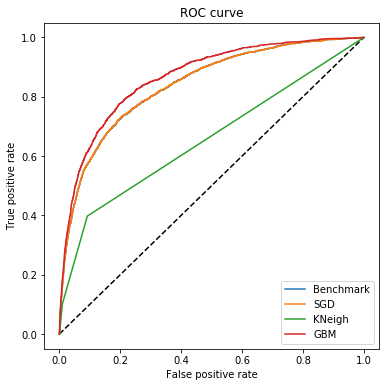

_Table 8. Comparing benchmark and candidates_

,Training time,Accuracy,fbeta2,ROC AUC
kneigh,00:00:03.163364,0.930833,0.119468,0.655625
Benchmark,00:00:00.972847,0.935100,0.150496,0.839294
sgd,00:00:49.935813,0.934967,0.158161,0.839422
gbm,00:00:30.044658,0.936167,0.223358,0.865726


In [18]:
plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')

fpr, tpr, ts = roc_curve(y_test, results['Benchmark']['probabilities'])
plt.plot(fpr, tpr, label = "Benchmark")

fpr, tpr, ts = roc_curve(y_test, results['sgd']['probabilities'])
results['sgd']['roc_auc'] = auc(fpr, tpr)
plt.plot(fpr, tpr, label = "SGD")

fpr, tpr, ts = roc_curve(y_test, results['kneigh']['probabilities'])
results['kneigh']['roc_auc'] = auc(fpr, tpr)
plt.plot(fpr, tpr, label = "KNeigh")

fpr, tpr, ts = roc_curve(y_test, results['gbm']['probabilities'])
results['gbm']['roc_auc'] = auc(fpr, tpr)
plt.plot(fpr, tpr, label = "GBM")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

metrics = []
indices = []
for r in results:
    metrics = metrics + [(results[r]['time'], results[r]['accuracy'], results[r]['fbeta'], results[r]['roc_auc'])]
    indices = indices + [r]

display(Markdown("_Table 8. Comparing benchmark and candidates_"))
display(pd.DataFrame(metrics,
                     columns = ['Training time', 'Accuracy', 'fbeta2', 'ROC AUC'],
                     index = indices).sort_values(by = ['ROC AUC']))

It was observed that the best performing algorithm is Gradient Boosting. Gradient Boosting and SGD scored higher than the benchmark, being SGD too close to the benchmark though.

KNeighbors was well below the benchmark and won't be considered for further analysis.

### Refinement

The best performance out-of-box was achieved using the Gradient Boosting Classifier, which scored 0.865726  in the Area Under Curve criteria.

The following code segment will try to improve this model by fine-tuning its hyper-paramters using [Grid Search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), which will exhaustively search over the specified parameters values using the desired estimator (Gradient Boosting), while evaluating every pass using ROC Area Under Curve metric.

In [19]:
from sklearn.model_selection import GridSearchCV

# Creating the classifier
gbm = GradientBoostingClassifier(random_state = 0, presort = False)

# Defining the parameters we want to test
parameters = {'loss': ['deviance', 'exponential'],
              'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.15, 0.2]}

# Create the grid search object and train it
start = time()
gridSearch = GridSearchCV(gbm, parameters, scoring = 'roc_auc').fit(X_train, y_train)
end = time()

print "Grid search took {} s".format(str(timedelta(seconds = end - start)))
print "Best parameters are ", gridSearch.best_params_

Grid search took 0:34:48.370307 s
Best parameters are  {'n_estimators': 200, 'loss': 'exponential', 'learning_rate': 0.1}


In [20]:
# Fitting best estimator
start = time()
gridSearch.best_estimator_.fit(X_train, y_train)
end = time()
training_time = timedelta(seconds = end - start)
print "Best classifier training time: {}".format(str(training_time))

# Make predictions using the optimized model
start = time()
pred_test = gridSearch.best_estimator_.predict(X_test)
end = time()
print "Best classifier prediction time: {}".format(str(timedelta(seconds = end - start)))
print

optimized_proba = gridSearch.best_estimator_.predict_proba(X_test)[:, 1]

results['optimal'] = {'probabilities': optimized_proba,
                  'accuracy': accuracy_score(y_test, pred_test),
                  'fbeta': fbeta_score(y_test, pred_test, beta = 2.0),
                  'time': training_time}

Best classifier training time: 0:00:58.641775
Best classifier prediction time: 0:00:00.156595



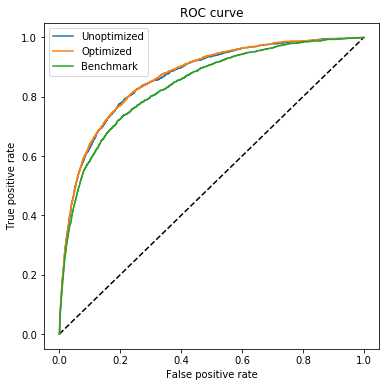

_Table 9. Metrics from benchmark, unoptimized gradient boosting and optimized gradient boosting._

,Training time,Accuracy,fbeta2,ROC AUC
Benchmark,00:00:00.972847,0.935100,0.150496,0.839294
gbm,00:00:30.044658,0.936167,0.223358,0.865726
optimal,00:00:58.641775,0.936333,0.224009,0.867495


In [21]:
# Visualizing the performance of both models
plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')

fpr, tpr, ts = roc_curve(y_test, results['gbm']['probabilities'])
plt.plot(fpr, tpr, label = "Unoptimized")

fpr, tpr, ts = roc_curve(y_test, results['optimal']['probabilities'])
plt.plot(fpr, tpr, label = "Optimized")
results['optimal']['roc_auc'] = auc(fpr, tpr)

fpr, tpr, ts = roc_curve(y_test, results['Benchmark']['probabilities'])
plt.plot(fpr, tpr, label = "Benchmark")

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

metrics = []
indices = []
for r in ['gbm', 'Benchmark', 'optimal']:
    metrics = metrics + [(results[r]['time'], results[r]['accuracy'], results[r]['fbeta'], results[r]['roc_auc'])]
    indices = indices + [r]
      
display(Markdown("_Table 9. Metrics from benchmark, unoptimized gradient boosting and optimized gradient boosting._"))
display(pd.DataFrame(metrics,
                     columns = ['Training time', 'Accuracy', 'fbeta2', 'ROC AUC'],
                     index = indices).sort_values(by = ['ROC AUC']))

---

## IV. Results

### Model Evaluation and Validation

The final, best performing model was choosed based on the evaluated metrics, mainly Receiver Operating Curve - Area Under Curve, which proved to be the best metric for this kind of dataset and problem - it's unaffected by class distribution. As expected, accuracy proved to be highly ineffective - our naïve assumption provided a 93.316% accuracy, so did all the models, which presented values ranging from 93.0% to 93.6%. 

_Table 10. Consolidated results_

| Algorithm | Training time | Accuracy | fbeta2 | ROC AUC |
|---|---|---|---|---|
| **kneigh** | 00:00:03.693158 | 0.930833 |	0.119468 | 0.655625 |
| **Benchmark** | 00:00:00.916679 | 0.935100 | 0.150496 | 0.839294 |
| **sgd** | 00:00:51.549854 | 0.935233 | 0.150567 | 0.839410 |
| **gbm** | 00:00:26.674639 | 0.936167 | 0.223358 | 0.865726 |
| **optimzed gbm** | *00:02:38.668936* | *0.936333* | *0.224009* | *0.867495* |

The best model was the one using Gradient Boosting classifier with its hyper parameters adjusted to the values in the optimized column:

_Table 11. Hyper parameters_

| Hyper parameters | Default | Gradient Booosting | Optimized Gradient Boosting|
| :--- | :---: | :---: |
| **loss function** | deviance | deviance | exponential |
| **n_estimators** | 100 | 100 | 200 |
| **presort** | auto | false | false |

All models were evaluated using an unseen test set, unfortunately there is no more labeled data to use and validate it.

### Justification

The results achieved by the optimized model are stronger (0.867495) than the bechmark model (0.839294) using the ROC AUC metric and they are also better in accuracy (93.633%) then the previous naïve assumption (93.316%).

_Table 12. Benchmark and Optimized GBM results_

| | Training time | Accuracy | fbeta2 | ROC AUC |
| --- | --- | --- | --- | --- |
| **Benchmark** | 00:00:00.916679 | 0.935100 | 0.150496 | 0.839294 |
| **optimzed gbm** | *00:02:38.668936* | *0.936333* | *0.224009* | *0.867495* |

Nevertheless, it is necessary to justify our statement with further analysis. The optimized model is compared against the benchmark using two evaluation tools: classification report and confusion matrix.

In [22]:
def getOptimalCutoff(target, predicted):
    """
    Find the optimal probability cutoff point for a classification model related to event rate
    
    * Based on the code in Stack Overflow: https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
    
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations
    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, ts = roc_curve(target, predicted)

    # Calculating optimal threshold
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr - (1 - fpr), index = i), 'threshold' : pd.Series(ts, index = i)})
    roc_t = roc.iloc[(roc.tf - 0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

cutoffGBM = getOptimalCutoff(y_test, results['optimal']['probabilities'])
print "Optimal cutoff (optimized model) = {}".format(cutoffGBM)
cutoffBenchmark = getOptimalCutoff(y_test, results['Benchmark']['probabilities'])
print "Optimal cutoff (benchmark) = {}".format(cutoffBenchmark)

def processPrediction(probas, cutoff):
    """
    Generates prediction array from probabilities and cutoff
    """
    preds = []
    for p in probas:
        if p > cutoff:
            preds.append(1)
        else:
            preds.append(0)
    
    return preds


# Applying cutoff to the predictions
predictionsGBM = processPrediction(results['optimal']['probabilities'], cutoffGBM)
predictionsBenchmark = processPrediction(results['Benchmark']['probabilities'], cutoffBenchmark)

Optimal cutoff (optimized model) = [0.062297003867280397]
Optimal cutoff (benchmark) = [0.056372220173279822]


In [23]:
from sklearn.metrics import classification_report

display(Markdown("_Table 13. Benchmark classification report_"))
print classification_report(y_test, predictionsBenchmark)
display(Markdown("_Table 14. Optimized model classification report_"))
print classification_report(y_test, predictionsGBM)

_Table 13. Benchmark classification report_

             precision    recall  f1-score   support

          0       0.98      0.76      0.85     27995
          1       0.18      0.76      0.30      2005

avg / total       0.92      0.76      0.82     30000



_Table 14. Optimized model classification report_

             precision    recall  f1-score   support

          0       0.98      0.79      0.87     27995
          1       0.21      0.79      0.33      2005

avg / total       0.93      0.79      0.84     30000



_Table 15. Normalized confusion matrix for the benchmark._

Normalized confusion matrix
[[ 0.75949277  0.24050723]
 [ 0.24089776  0.75910224]]


_Table 16. Normalized confusion matrix for the optimized GBM._

Normalized confusion matrix
[[ 0.78578318  0.21421682]
 [ 0.21446384  0.78553616]]


#### Confusion matrices

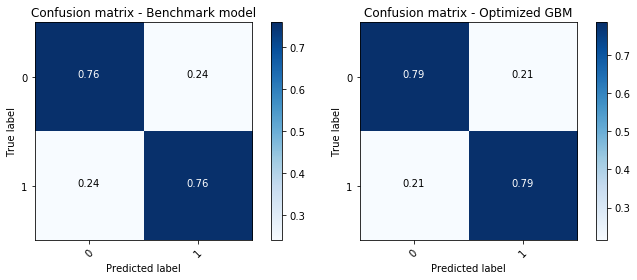

In [24]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    ** Based on plot_confusion_matrix() from sklearn documentation **
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
display(Markdown("_Table 15. Normalized confusion matrix for the benchmark._"))
plot_confusion_matrix(confusion_matrix(y_test, predictionsBenchmark),
                     ['0', '1'],
                     normalize = True,
                     title = "Confusion matrix - Benchmark model")

plt.subplot(1, 2, 2)
display(Markdown("_Table 16. Normalized confusion matrix for the optimized GBM._"))
plot_confusion_matrix(confusion_matrix(y_test, predictionsGBM),
                     ['0', '1'],
                     normalize = True,
                     title = "Confusion matrix - Optimized GBM")

display(Markdown("#### Confusion matrices"))
plt.tight_layout()

As observed in the classification report and in the confusion matrix, the optimized Gradient Boosting Classifier achieved better scores and metrics.

In the classification report, the recall is one of the most important metrics and Gradient Boosting achieved 0.79, which also influenced the confusion matrix results, showing 0.79 for True Positive and True Negative rate.

## V. Conclusion

### Free-Form Visualization

One possible, and useful, way to visualize the predictions made by our model is creating some kind of credit score ranging from 0 to 100 based on the predicted probabilities, where the higher, the better is someone's score.

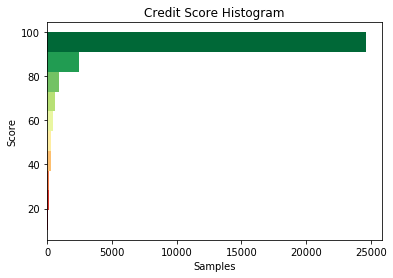

In [25]:
scores = (1 - results['optimal']['probabilities']) * 100
plt.figure()

cm = plt.cm.get_cmap('RdYlGn')
n, bins, patches = plt.hist(scores, bins = 10, orientation = 'horizontal', label = 'Credit Score', color = 'red')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.title('Credit Score Histogram')
plt.ylabel('Score')
plt.xlabel('Samples')
plt.show()

The histogram is also in line with the characteristics of our dataset, which has few samples of persons in financial distress.

### Reflection

First and foremost, the dataset was loaded, explored and right there I realized that there was missing data and kinds of distributions quite difficult to visualize, such as skewed distributions and sparse data. Furthermore, these characteristics along could jeopardize the results of the entire project.

The exploring phase prepared the ground for the data preprocessing that would come next. In the preprocessing I had to come up with a method to replace the missing values instead of losing the sample and which would affect the dataset as little as possible - done replacing the missing values with the mean for that feature. The next challenge was transforming the features so that their sparseness, skewness wouldn't be a problem later. The log transformation achieved these results and also reduced the effect of outliers on the algorithms used later in the implementation.

Finally, in the implementation phase, I had to adjust the implementation of the models and the refinement by trial-and-error, which involved lots of iterations and time, but at the end I came up with a solution that allowed me to save and compare the results later. Furthermore, I believe the model could be used by people who wishes to computer their own credit score, helping them deciding if a new mortgage or loan will be a good decision.

### Improvement

Actually, there is room for improvement. I would like to include a Principal Component Analysis to identify which features are responsible for most of the variance in the dataset and to use the identified components in the model, observing how they influence it.

Another possible strategy is always research some different algorithms, which could boost either training time and metrics. One strong candidate is XGBoost.

---

Last but not least, the competition required to process csTest.csv dataset and publish the predictions using the optimized model.

In [26]:
# Load competition test set
try:
    csTest = pd.read_csv("dataset/cs-test.csv", index_col = 0)
    display(Markdown("_Table 17. Sampling first 5 rows of the competition test set_"))
    display(csTest.head(5))
    print "* Competition test dataset has {} samples with {} features each.".format(*csTest.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

_Table 17. Sampling first 5 rows of the competition test set_

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


* Competition test dataset has 101503 samples with 11 features each.


In [27]:
# Droping SeriousDlqin2yrs, which is our target
csTest_features_raw = csTest.drop('SeriousDlqin2yrs', axis = 1)

# Data preparation
csTest_features_nan = replaceNaNvaluesByMedian(csTest_features_raw)

keys = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
          'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
          'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

csTest_features_final = applyLogTransformation(csTest_features_nan, keys)
print csTest_features_final.shape

(101503, 10)


In [28]:
# Predicting probabilities
csTest_proba = gridSearch.best_estimator_.predict_proba(csTest_features_final)[:, 1]
creditScore = pd.DataFrame(data = csTest_proba, columns = ['Credit Score'])

try:
    creditScore.to_csv("dataset/cs_pred.csv")
    print "csTest predictions (credit score) saved!"
except:
    print "Could not save csTest predictions!"
    
display(Markdown("_Table 18. Sampling first 5 rows of the predicted credit score_"))
display(creditScore.head(5))

csTest predictions (credit score) saved!


_Table 18. Sampling first 5 rows of the predicted credit score_

,Credit Score
0,0.065353
1,0.049706
2,0.013163
3,0.078185
4,0.096483


In [29]:
# Predicting SeriousDlqin2yrs and adding it back to the dataset
csTest['SeriousDlqin2yrs'] = processPrediction(csTest_proba, cutoffGBM)
display(Markdown("_Table 19. Sampling first 5 rows of the recomposed test set_"))
display(csTest.head(5))

_Table 19. Sampling first 5 rows of the recomposed test set_

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,1,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


---